In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 128
batch_size = 8

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3),activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.6))

    model.add(Conv2D(256, (3, 3),activation="relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3),activation="relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3),activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.6))

    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.6))

    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [4]:
model = Model()
model.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history50 = model.fit_generator(
    train,
    epochs=100,
    validation_data=val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 batch_normalization_1 (Batc  (None, 124, 124, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 128)      0         
 )                                                               
                                                        

<ipython-input-4-ec8b19061eb1>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history50 = model.fit_generator(


Epoch 1/100
1000/1000 [==============================] - 321s 304ms/step - loss: 1.9668 - acc: 0.4710 - val_loss: 2.8300 - val_acc: 0.5010
Epoch 2/100
1000/1000 [==============================] - 109s 109ms/step - loss: 1.2040 - acc: 0.6325 - val_loss: 3.0739 - val_acc: 0.4530
Epoch 3/100
1000/1000 [==============================] - 332s 332ms/step - loss: 1.0357 - acc: 0.6800 - val_loss: 1.8953 - val_acc: 0.5645
Epoch 4/100
1000/1000 [==============================] - 344s 344ms/step - loss: 0.9400 - acc: 0.7055 - val_loss: 1.8433 - val_acc: 0.5925
Epoch 5/100
1000/1000 [==============================] - 189s 189ms/step - loss: 0.8745 - acc: 0.7260 - val_loss: 0.9199 - val_acc: 0.7470
Epoch 6/100
1000/1000 [==============================] - 130s 129ms/step - loss: 0.8213 - acc: 0.7514 - val_loss: 3.9095 - val_acc: 0.3840
Epoch 7/100
1000/1000 [==============================] - 108s 108ms/step - loss: 0.7413 - acc: 0.7717 - val_loss: 0.9617 - val_acc: 0.7525
Epoch 8/100
1000/1000 [====

In [5]:
model.save("model_100.h5")

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-6-fc49372332d9>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test)


1000

In [7]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

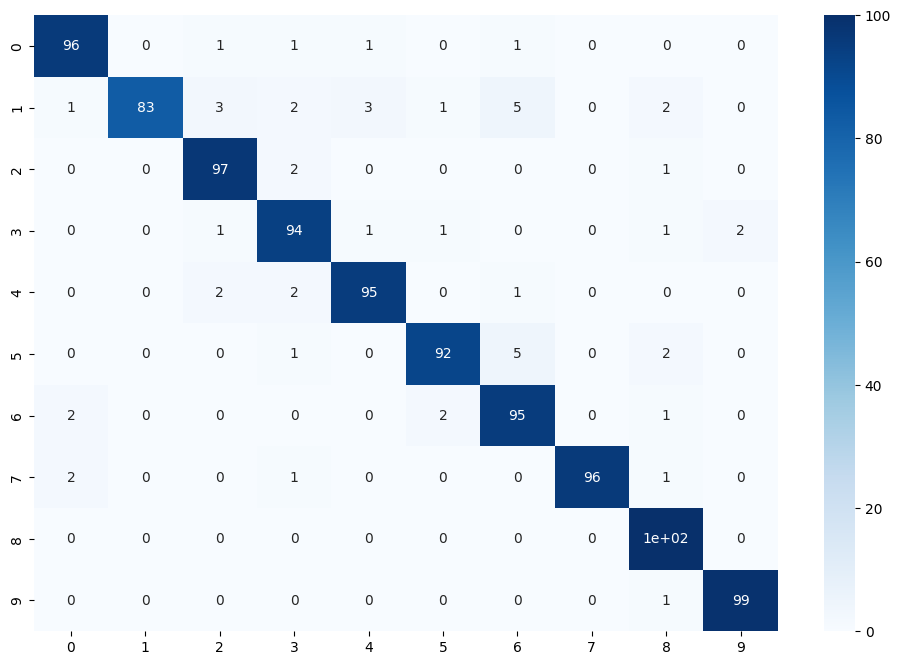

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [9]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.9505    0.9600    0.9552       100
                        Tomato___Early_blight     1.0000    0.8300    0.9071       100
                         Tomato___Late_blight     0.9327    0.9700    0.9510       100
                           Tomato___Leaf_Mold     0.9126    0.9400    0.9261       100
                  Tomato___Septoria_leaf_spot     0.9500    0.9500    0.9500       100
Tomato___Spider_mites Two-spotted_spider_mite     0.9583    0.9200    0.9388       100
                         Tomato___Target_Spot     0.8879    0.9500    0.9179       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     1.0000    0.9600    0.9796       100
                 Tomato___Tomato_mosaic_virus     0.9174    1.0000    0.9569       100
                             Tomato___healthy     0.9802    0.9900    0.9851      

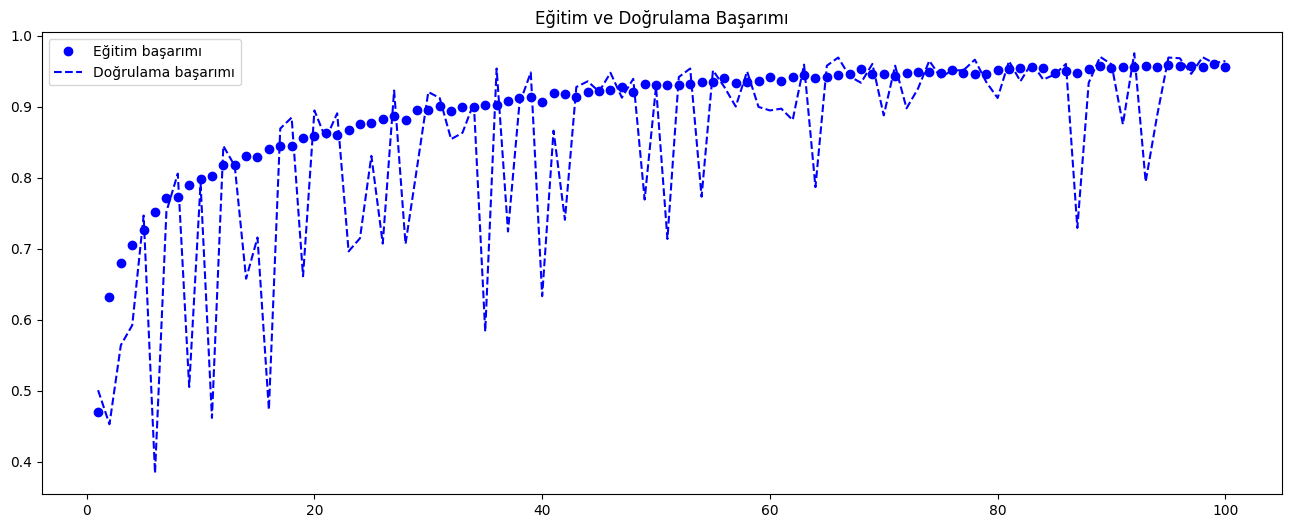

<Figure size 640x480 with 0 Axes>

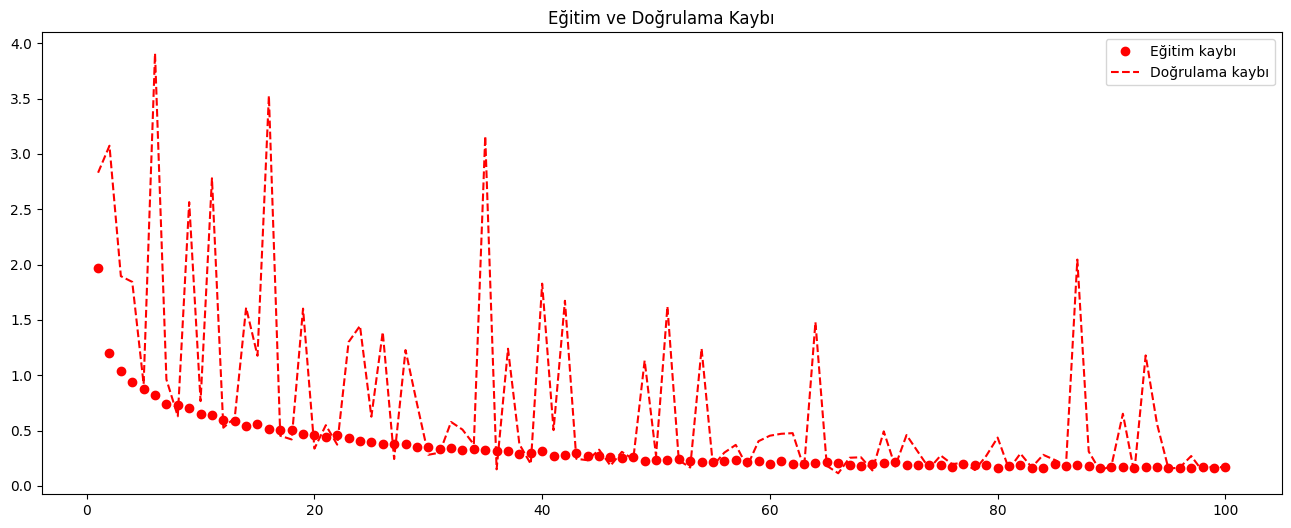

In [10]:
import matplotlib.pyplot as plt
acc_original=history50.history["acc"]
val_acc_original=history50.history["val_acc"]
loss_original=history50.history["loss"]
val_loss_original=history50.history["val_loss"]

epochs=range(1,len(acc_original)+1)
val_epochs=range(1,len(val_acc_original)+1)


sizeplt=plt.figure()
sizeplt.set_figwidth(16)
sizeplt.set_figheight(6)

plt.plot(epochs,acc_original,'bo',label="Eğitim başarımı")
plt.plot(val_epochs,val_acc_original,'b--',label="Doğrulama başarımı")
plt.title("Eğitim ve Doğrulama Başarımı")
plt.legend()
plt.figure()


sizeplt=plt.figure()
sizeplt.set_figwidth(16)
sizeplt.set_figheight(6)

plt.plot(epochs,loss_original,'ro',label="Eğitim kaybı")
plt.plot(val_epochs,val_loss_original,'r--',label="Doğrulama kaybı")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()

plt.show()

In [11]:
import visualkeras as vk
vk.layered_view(model,legend=True).show()

In [12]:
import visualkeras as vk
vk.layered_view(model,legend=True,to_file="model.png").show()

In [13]:
import visualkeras as vk
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 64) 
vk.layered_view(model,legend=True,to_file="model.png").show()

In [14]:
import visualkeras as vk
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 64) 
vk.layered_view(model,legend=True,to_file="model.png",font=font).show()

In [15]:
import visualkeras as vk
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 32) 
vk.layered_view(model,legend=True,to_file="model.png",font=font).show()

In [16]:
import visualkeras as vk
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 24) 
vk.layered_view(model,legend=True,to_file="model.png",font=font).show()

In [17]:
import visualkeras as vk
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 18) 
vk.layered_view(model,legend=True,to_file="model.png",font=font).show()

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-18-fc49372332d9>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test)


1000

In [19]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

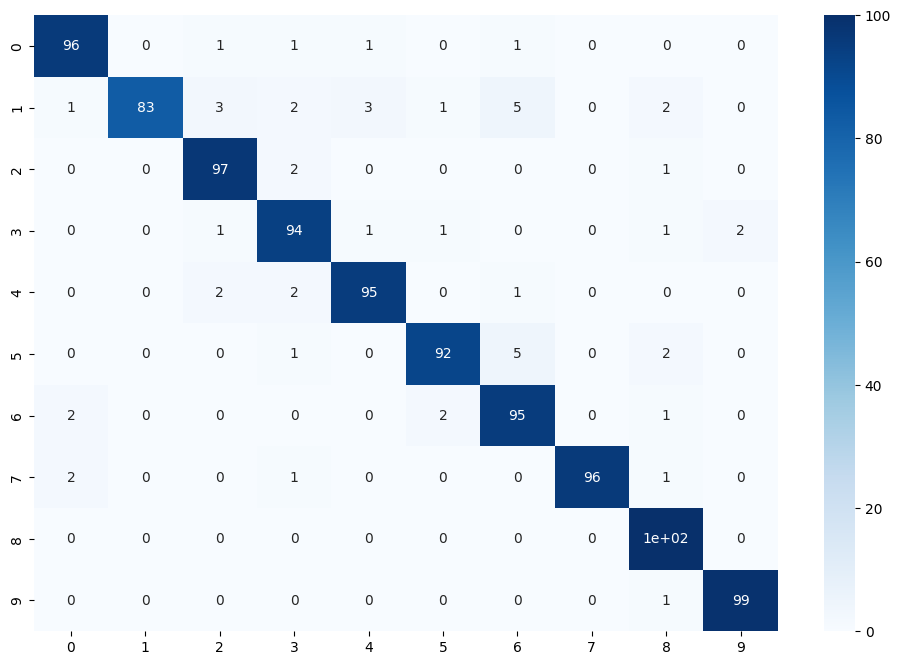

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [21]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.9505    0.9600    0.9552       100
                        Tomato___Early_blight     1.0000    0.8300    0.9071       100
                         Tomato___Late_blight     0.9327    0.9700    0.9510       100
                           Tomato___Leaf_Mold     0.9126    0.9400    0.9261       100
                  Tomato___Septoria_leaf_spot     0.9500    0.9500    0.9500       100
Tomato___Spider_mites Two-spotted_spider_mite     0.9583    0.9200    0.9388       100
                         Tomato___Target_Spot     0.8879    0.9500    0.9179       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     1.0000    0.9600    0.9796       100
                 Tomato___Tomato_mosaic_virus     0.9174    1.0000    0.9569       100
                             Tomato___healthy     0.9802    0.9900    0.9851      

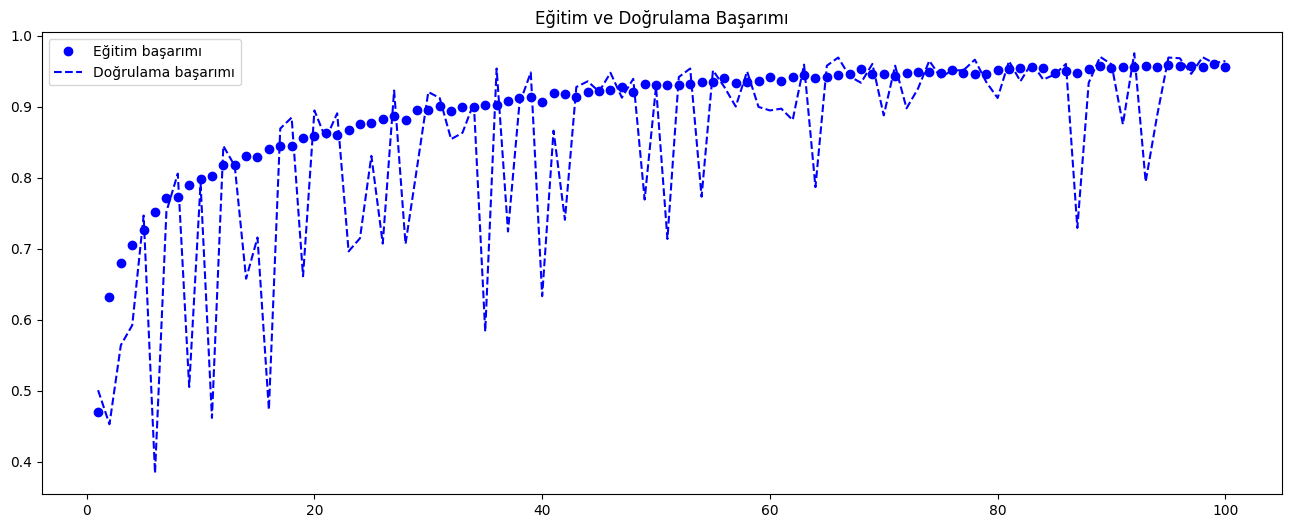

<Figure size 640x480 with 0 Axes>

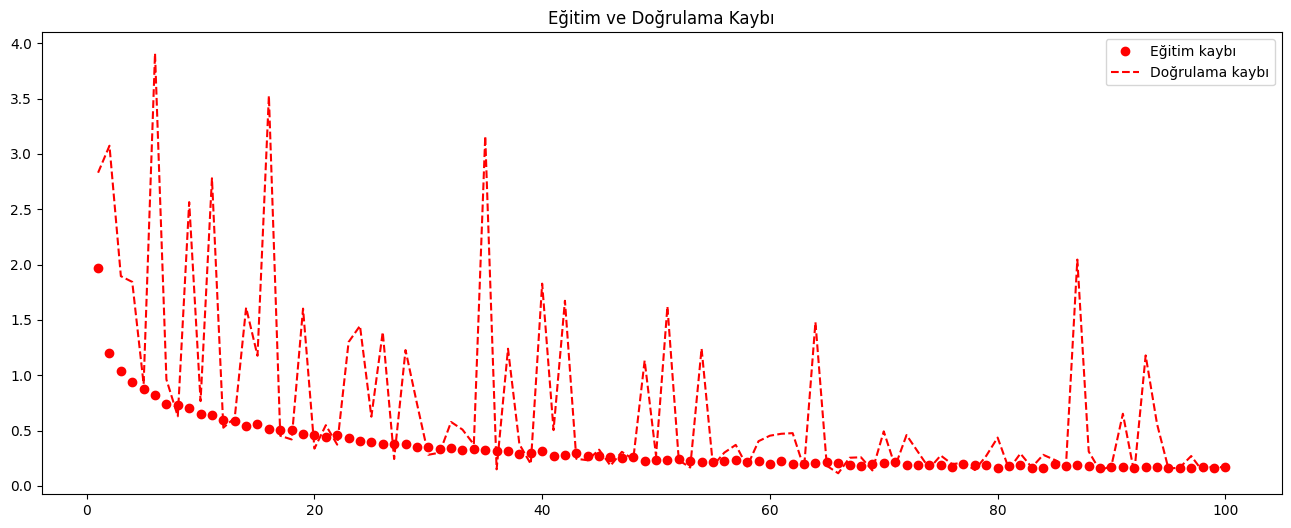

In [22]:
import matplotlib.pyplot as plt
acc_original=history50.history["acc"]
val_acc_original=history50.history["val_acc"]
loss_original=history50.history["loss"]
val_loss_original=history50.history["val_loss"]

epochs=range(1,len(acc_original)+1)
val_epochs=range(1,len(val_acc_original)+1)


sizeplt=plt.figure()
sizeplt.set_figwidth(16)
sizeplt.set_figheight(6)

plt.plot(epochs,acc_original,'bo',label="Eğitim başarımı")
plt.plot(val_epochs,val_acc_original,'b--',label="Doğrulama başarımı")
plt.title("Eğitim ve Doğrulama Başarımı")
plt.legend()
plt.figure()


sizeplt=plt.figure()
sizeplt.set_figwidth(16)
sizeplt.set_figheight(6)

plt.plot(epochs,loss_original,'ro',label="Eğitim kaybı")
plt.plot(val_epochs,val_loss_original,'r--',label="Doğrulama kaybı")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()

plt.show()

In [23]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite","wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MTG\AppData\Local\Temp\tmp30bfhwob\assets


INFO:tensorflow:Assets written to: C:\Users\MTG\AppData\Local\Temp\tmp30bfhwob\assets


In [24]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()

print("Input shape:",input_details[0]["shape"])
print("Input type:",input_details[0]["dtype"])
print("Output shape:",output_details[0]["shape"])
print("Output type:",output_details[0]["dtype"])

Input shape: [  1 128 128   3]
Input type: <class 'numpy.float32'>
Output shape: [ 1 10]
Output type: <class 'numpy.float32'>


In [25]:
import visualkeras as vk
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 18) 
vk.layered_view(model,legend=True,draw_volume=False, to_file="modeldrawFalse.png",font=font).show()

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
